# oWAR distribution
### Is there a r.v. that best models oWAR distribution?

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
    s

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
    s

AttributeError: _ARRAY_API not found

/home/jordan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
# you need oWAR calculated on batting table in sqlite3. See sqlite_files/ for more details.
conn = sqlite3.connect('bb.db')

batting_df = pd.read_sql_query(
    "SELECT * FROM batting",
    conn
)

In [4]:
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113799 entries, 0 to 113798
Data columns (total 29 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   playerID   113799 non-null  object 
 1   yearID     113799 non-null  int64  
 2   stint      113799 non-null  int64  
 3   teamID     113799 non-null  object 
 4   lgID       113799 non-null  object 
 5   G          113799 non-null  int64  
 6   G_batting  113799 non-null  object 
 7   AB         113799 non-null  int64  
 8   R          113799 non-null  int64  
 9   H          113799 non-null  int64  
 10  2B         113799 non-null  int64  
 11  3B         113799 non-null  int64  
 12  HR         113799 non-null  int64  
 13  RBI        113799 non-null  object 
 14  SB         113799 non-null  object 
 15  CS         113799 non-null  object 
 16  BB         113799 non-null  int64  
 17  SO         113799 non-null  object 
 18  IBB        113799 non-null  object 
 19  HBP        113799 non-n

In [5]:
# a lot of these rows have null values of oWAR.
# it looks like it is for players with 0 PAs in a season.
batting_df[batting_df['oWAR'].isna()]

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,...,HBP,SH,SF,GIDP,G_old,wOBA,oRAA,PA,oRAR,oWAR
0,aardsda01,2004,1,SFN,NL,11,,0,0,0,...,0,0,0,0,,NaN,NaN,0,NaN,NaN
2,aardsda01,2007,1,CHA,AL,25,,0,0,0,...,0,0,0,0,,NaN,NaN,0,NaN,NaN
4,aardsda01,2009,1,SEA,AL,73,,0,0,0,...,0,0,0,0,,NaN,NaN,0,NaN,NaN
5,aardsda01,2010,1,SEA,AL,53,,0,0,0,...,0,0,0,0,,NaN,NaN,0,NaN,NaN
6,aardsda01,2012,1,NYA,AL,1,,0,0,0,...,0,0,0,0,,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113782,zuverge01,1951,1,CLE,AL,16,,0,0,0,...,0,0,0,0,,NaN,NaN,0,NaN,NaN
113783,zuverge01,1952,1,CLE,AL,2,,0,1,0,...,0,0,0,0,,NaN,NaN,0,NaN,NaN
113796,zychto01,2015,1,SEA,AL,13,,0,0,0,...,0,0,0,0,,NaN,NaN,0,NaN,NaN
113797,zychto01,2016,1,SEA,AL,12,,0,0,0,...,0,0,0,0,,NaN,NaN,0,NaN,NaN


In [6]:
batting_df[batting_df['PA'] == 0].count()

playerID     19572
yearID       19572
stint        19572
teamID       19572
lgID         19572
G            19572
G_batting    19572
AB           19572
R            19572
H            19572
2B           19572
3B           19572
HR           19572
RBI          19572
SB           19572
CS           19572
BB           19572
SO           19572
IBB          19572
HBP          19572
SH           19572
SF           19572
GIDP         19572
G_old        19572
wOBA             0
oRAA             0
PA           19572
oRAR             0
oWAR             0
dtype: int64

In [7]:
113800 - 19573

94227

0 PA explains nearly all of them. but theres some left.

In [8]:
batting_df[(batting_df['PA'] != 0) & (batting_df['oWAR'].isna())]

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,...,HBP,SH,SF,GIDP,G_old,wOBA,oRAA,PA,oRAR,oWAR
1180,alfonan01,2003,1,CHN,NL,60,,0,0,0,...,0,1,0,0,,NaN,NaN,1,NaN,NaN
1509,almanar01,2004,1,ATL,NL,13,,0,0,0,...,0,1,0,0,,NaN,NaN,1,NaN,NaN
2291,anderla02,1986,1,PHI,NL,10,,0,0,0,...,0,1,0,0,,NaN,NaN,1,NaN,NaN
3074,arroylu01,1963,1,NYA,AL,6,,0,0,0,...,0,1,0,0,,NaN,NaN,1,NaN,NaN
3542,avilalu01,2013,1,ATL,NL,75,,0,0,0,...,0,1,0,0,,NaN,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110847,wilsoga03,1995,1,PIT,NL,10,,0,0,0,...,0,1,0,0,,NaN,NaN,1,NaN,NaN
111258,winklda01,2019,1,ATL,NL,27,,0,0,0,...,0,1,0,0,,NaN,NaN,1,NaN,NaN
112426,wuertmi01,2006,1,CHN,NL,41,,0,0,0,...,0,1,0,0,,NaN,NaN,1,NaN,NaN
112603,yancyhu01,1974,1,CHA,AL,1,,0,0,0,...,0,1,0,0,,NaN,NaN,1,NaN,NaN


In [9]:
batting_df[(batting_df['PA'] != 0) & (batting_df['oWAR'].isna())]['PA'].unique()

array([1, 2, 4])

In [10]:
batting_df[(batting_df['PA'] != 0) & (batting_df['oWAR'].isna())]['AB'].unique()

array([0])

The rest have 0 AB.

In [11]:
batting_df = batting_df[(batting_df['PA'] > 0) & (batting_df['AB'] > 0)]

In [12]:
batting_df['oWAR_adj'] = batting_df['oWAR'] / batting_df['PA']

# Plots

<Axes: xlabel='oWAR', ylabel='Count'>

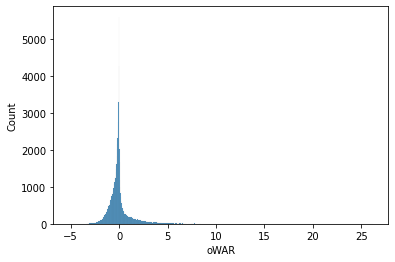

In [13]:
sns.histplot(batting_df['oWAR'])

Plot above makes sense to me. oWAR should be 'how many wins above the average player have you contributed to your team.' meaning that oWAR should have a median of 0. Lets see if that holds.

In [14]:
batting_df['oWAR'].median()

np.float64(-0.12311430596334919)

Close enough.

Now what is interesting is that there may be two distributions here. I wonder if we can say (-\inf, 0) is one best modeled by one distribution and (0, \inf) can be modeled by another. I am thinking some sort of power law for both of them. Lets start out with Pareto.

In [15]:
pos_oWAR_df = batting_df[batting_df['oWAR'] > 0]

<Axes: xlabel='oWAR', ylabel='Count'>

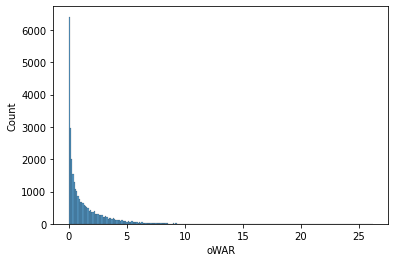

In [16]:
sns.histplot(pos_oWAR_df['oWAR'])

In [17]:
from scipy.stats import pareto, goodness_of_fit
from random import sample

s = sample(list(pos_oWAR_df['oWAR']), int(.1*len(list(pos_oWAR_df['oWAR']))))

rng = np.random.default_rng(seed=24)

p = pareto.fit(s)

for t in ('ad', 'ks', 'cvm', 'filliben'):
    # fit_params specifies params that were fit by scipy.fit in a previous step.
    res = goodness_of_fit(
        pareto,
        s,
        fit_params={'b': p[0]},
        statistic=t,
        n_mc_samples=9999,
        random_state=rng
    )

    finding = 'This supports H_o (that this distribution fits) (95% confidence)'
    if res.pvalue < .0005:
        finding = 'Reject H_o (not this distribution)'

    print(f"Test: {t}")
    print(f"p-value: {res.pvalue}")
    print(f"Status: {finding}")

KeyboardInterrupt: 

In [18]:
neg_oWAR_df = batting_df[batting_df['oWAR'] < 0]

<Axes: xlabel='oWAR', ylabel='Count'>

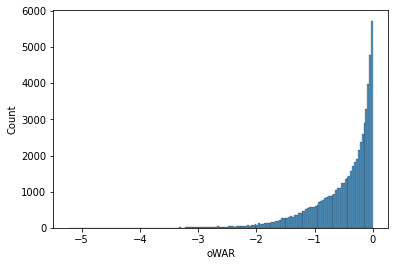

In [19]:
sns.histplot(neg_oWAR_df['oWAR'])

In [20]:
s = sample(list(neg_oWAR_df['oWAR']), int(.1*len(list(neg_oWAR_df['oWAR']))))

p = pareto.fit(s)

for t in ('ad', 'ks', 'cvm', 'filliben'):
    # fit_params specifies params that were fit by scipy.fit in a previous step.
    res = goodness_of_fit(
        pareto,
        s,
        fit_params={'b': p[0]},
        statistic=t,
        n_mc_samples=9999,
        random_state=rng
    )

    finding = 'This supports H_o (that this distribution fits) (95% confidence)'
    if res.pvalue < .0005:
        finding = 'Reject H_o (not this distribution)'

    print(f"Test: {t}")
    print(f"p-value: {res.pvalue}")
    print(f"Status: {finding}")

/home/jordan/.local/lib/python3.10/site-packages/scipy/stats/_resampling.py:991: RuntimeWarning: invalid value encountered in scalar subtract
  cmps = null_distribution >= observed - gamma


Test: ad
p-value: 0.0001
Status: Reject H_o (not this distribution)
Test: ks
p-value: 0.0001
Status: Reject H_o (not this distribution)
Test: cvm
p-value: 0.0001
Status: Reject H_o (not this distribution)
Test: filliben
p-value: 0.0001
Status: Reject H_o (not this distribution)


Well neither of them are Pareto and the other distributions take way too long to test. It does not really matter anyway, what I really want to do is use this information to highlight interesting results.

## Who are the best players in terms of accumulated oWAR?

In [20]:
batting_df.set_index('playerID', inplace=True)

In [21]:
# first, without adjusting for time served.

# we CAN sum oWAR. even though some fangraphs factors are different per season, what matters
# is the accumulated oWAR in each season and how much that player has accumulated over their
# career.
total_batting_df = batting_df.groupby('playerID')[['G', 'PA', 'oWAR']].sum()

# I think we have seen this list time and time again.
total_batting_df.sort_values('oWAR', ascending=False).head(25)

,G,PA,oWAR
playerID,,,
bondsba01,2986,13294,191.458049
ruthba01,2503,10616,164.432062
willite01,2292,9877,153.467555
aaronha01,3298,14233,147.985555
cobbty01,3035,13071,142.218997
musiast01,3026,12839,135.413099
mayswi01,2992,12685,132.544124
robinfr02,2808,11961,123.623334
mantlmi01,2401,10035,116.861941


<Axes: xlabel='PA', ylabel='oWAR'>

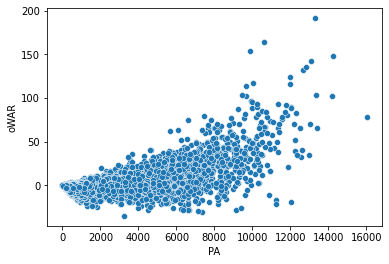

In [22]:
sns.scatterplot(x=total_batting_df['PA'], y=total_batting_df['oWAR'])

In [23]:
# adjusting for PAs
total_batting_df['oWAR_adj'] = total_batting_df['oWAR'] / total_batting_df['PA']

total_batting_df[total_batting_df['PA'] > 10].sort_values('oWAR_adj', ascending=False).head(25)

# so i arbitrarily picked 10 PAs. We see Ted Williams and Babe Ruth shining as well as Bonds.
# But who are thse top players here? durhado01 has oWAR_adj over twice as good as Mays. What happened??

,G,PA,oWAR,oWAR_adj
playerID,,,,
durhado01,14,14,0.492761,0.035197
silvelu01,8,14,0.437221,0.031230
mcdonke01,8,11,0.306090,0.027826
milleha02,7,11,0.268538,0.024413
martige01,9,11,0.262149,0.023832
lopezot01,9,11,0.258374,0.023489
wallfo01,15,15,0.347268,0.023151
shortri01,11,17,0.387417,0.022789
dappecl01,8,19,0.421019,0.022159


## durhado01 - Donald Gary (Donald Durham) (1972-1973)
The dude was a pitcher. He was terrible at pitching. Career ERA 5.83. -0.9 WAR. His only full season was with the Cards and the team was an also-ran that year.

However, in 1972 he had 14 PAs and an OPS of 1.429.

ChatGPT helped me identify his standout offensive performances. Here is game against SFG in which he pitched 6.1 innings with only 1 earned run while batting two hits and mashing a 2-run HR to put the Cards up in the 5th inning.

https://www.baseball-reference.com/boxes/SFN/SFN197208180.shtml

His oWAR_adj value of 0.035197 makes him the supreme king in baseball history based off of my completely arbitrary cutoff of 10 PAs.


## silvelu01 - Luis Silverio (1978)
Outfielder/Pinch Runner

14 PAs and an OPS of 1.524 for a Royals team that went 92-72, won their division, and lost in the ALCS 3-1 vs the eventual-World-Series-winning Yankees.

This guy really feels like someone who was obviously more fit for a managerial/corporate position. After his one year, he served for 35 years in the Royal's organization and coached for the Royals for 5 years. Currently (as of 2024) he is serving a front office role in the Pirates for adivsing Latin American operations.

## mcdonke01 - Keith McDonald (2000-2001)
McDonkey!

Another Cardinal. In 2000 he had 9 PAs and garnered an OPS of 2.270. He was a catcher and Pinch Hitter (also an American born in Japan). This dude managed to mash a HR in both of his first MLB at bats. He has a total of 3 HRs across 9 PAs. Other than that, he seemed to languish in the minor leagues most of his career. I wonder why he was never given the greenlight? 

Here is a quote from an interesting blog post about him:

> McDonald often refers to himself as an organizational guy, the type of player who helps fill out the roster in the lower levels. While those types of players dream about the callup, after spending nearly seven seasons in the minors, McDonald wasn’t necessarily expecting to be headed to St. Louis in early July of 2000.
https://ballnine.com/2022/01/15/the-cult-hero/



Looks like he was a career minor leaguer and everybody, including himself, knew it.





In [24]:
# Now for a more reasonable value of PA
total_batting_df[total_batting_df['PA'] > 350].sort_values('oWAR_adj', ascending=False).head(25)

,G,PA,oWAR,oWAR_adj
playerID,,,,
willite01,2292,9877,153.467555,0.015538
ruthba01,2503,10616,164.432062,0.015489
bondsba01,2986,13294,191.458049,0.014402
gehrilo01,2164,9660,113.665196,0.011767
mantlmi01,2401,10035,116.861941,0.011645
troutmi01,1489,6639,74.592761,0.011236
hornsro01,2259,9475,103.724450,0.010947
cobbty01,3035,13071,142.218997,0.010880
jacksjo01,1332,5690,61.774372,0.010857


We see some current players such as Mike Trout, Aaron Judge, and ... yordan alvarez?

Also Manny Rameriz is a bit higher than I would have expected.

## Who are the worst players in terms of accumulated oWAR?

<Axes: xlabel='oWAR_adj', ylabel='Count'>

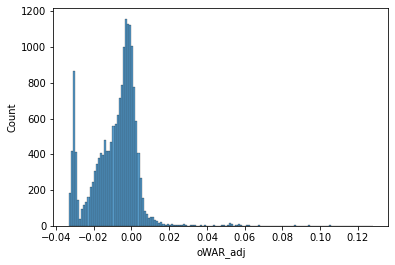

In [25]:
sns.histplot(total_batting_df['oWAR_adj'])

<Axes: xlabel='oWAR_adj', ylabel='PA'>

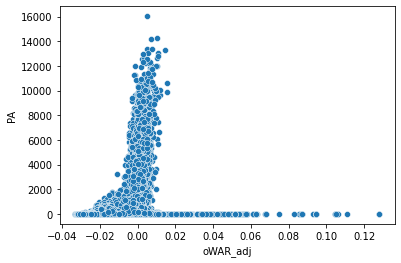

In [26]:
sns.scatterplot(x=total_batting_df['oWAR_adj'], y=total_batting_df['PA'])

In [27]:
# now lets look at some flops (wih PA > 10)
total_batting_df[total_batting_df['PA'] > 10].sort_values('oWAR_adj', ascending=True).head(25)

,G,PA,oWAR,oWAR_adj
playerID,,,,
odomda01,22,12,-0.395042,-0.032920
jenkity01,14,17,-0.557550,-0.032797
davidte01,101,33,-1.074062,-0.032547
gebripe01,27,14,-0.454703,-0.032479
kerrijo01,104,12,-0.387879,-0.032323
mcmahja02,34,15,-0.484734,-0.032316
collido01,40,12,-0.387251,-0.032271
lanfrwa01,39,12,-0.385427,-0.032119
nixja02,9,16,-0.513866,-0.032117


In [28]:
# most of the above list is pitchers, so lets look at 350 or more PAs
total_batting_df[total_batting_df['PA'] > 350].sort_values('oWAR_adj', ascending=True).head(25)

,G,PA,oWAR,oWAR_adj
playerID,,,,
davisdo02,263,466,-10.586555,-0.022718
mortoch02,284,370,-8.282567,-0.022385
chancde01,403,759,-16.650311,-0.021937
sheetbe01,250,513,-11.110007,-0.021657
wickeda01,283,362,-7.760750,-0.021439
haranaa01,388,747,-15.914673,-0.021305
klinero01,715,548,-11.450927,-0.020896
sanchan01,328,400,-8.324305,-0.020811
volqued01,257,362,-7.503038,-0.020727


Charlie Morton is at #2. Johnny Cueto also appears, and he certainly had a reputation for being a "free out".

In [29]:
# lets try and get actual batters
total_batting_df[total_batting_df['PA'] > 1000].sort_values('oWAR', ascending=True).head(25)

,G,PA,oWAR,oWAR_adj
playerID,,,,
bergebi01,947,3228,-35.034384,-0.010853
griffal01,1962,7367,-30.957583,-0.004202
guilloz01,1993,7158,-29.407379,-0.004108
foliti01,1696,6602,-28.587693,-0.004330
bowala01,2247,9148,-28.483249,-0.003114
theveto01,1229,4484,-28.014938,-0.006248
scottev01,1654,6373,-27.833201,-0.004367
brinked01,1845,6684,-27.691902,-0.004143
mcbrige01,1659,6235,-27.097910,-0.004346


Oh boy. #1 is a catcher and #2 is a shortstop. Here we go.

## griffal01 - Alfredo Griffin (1976-1993)

He won RoY with an OPS of .697, He had an All Star award in '84 and a Gold Glove in '85. What is very notable is that he did not hit barely any HRs. Only 24 in his 18 year career. He did manage to accumulate 1688 Hs over his career. He had a low SO rate but also a low BB rate. 

<Axes: xlabel='yearID', ylabel='oWAR'>

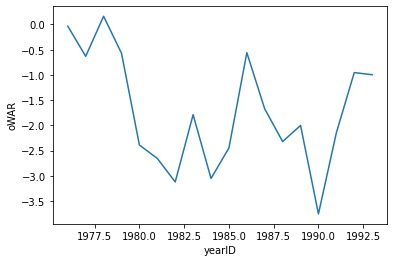

In [30]:
# he only had one season with a positive oWAR. YIKES.
sns.lineplot(
    x=batting_df.loc['griffal01']['yearID'],
    y=batting_df.loc['griffal01']['oWAR']
)

<Axes: xlabel='yearID', ylabel='oWAR_adj'>

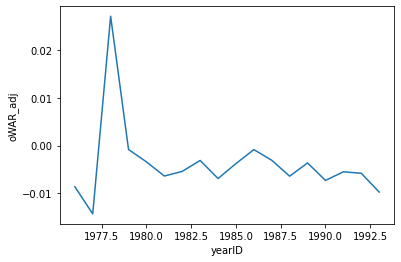

In [31]:
sns.lineplot(
    x=batting_df.loc['griffal01']['yearID'],
    y=batting_df.loc['griffal01']['oWAR_adj']
)

That one big spike was the season before his first full season where he had an OPS of 1.417 (but with only 6 PAs).

Is this guy an example of someone that people generally thought of as 'good enough' but who was, upon closer analysis, truly a liability? Or this an artifact of the oWAR calculation punishing people who do not hit for power? He seems to be someone who was a defensive-oriented shortstop. 

## Who are the most average players in terms of accumulated oWAR?

In [32]:
total_batting_df['abs_oWAR'] = total_batting_df['oWAR'].map(abs)
total_batting_df[total_batting_df['PA'] > 10].sort_values('abs_oWAR', ascending=True).head(25)

,G,PA,oWAR,oWAR_adj,abs_oWAR
playerID,,,,,
kjershe01,13,32,-1.639310e-16,-5.122845e-18,1.639310e-16
bergejo02,11,18,1.419490e-05,7.886055e-07,1.419490e-05
baldwha01,11,12,-9.704733e-05,-8.087278e-06,9.704733e-05
engelst01,11,19,-2.929688e-04,-1.541941e-05,2.929688e-04
martipa01,10,15,5.852225e-04,3.901483e-05,5.852225e-04
mcbripe01,13,33,-9.191824e-04,-2.785401e-05,9.191824e-04
churrjo01,12,21,9.468990e-04,4.509043e-05,9.468990e-04
graboal01,41,51,-1.800339e-03,-3.530076e-05,1.800339e-03
emersch01,8,27,-1.808319e-03,-6.697479e-05,1.808319e-03


## kjershe01 - Heston Kjerstad (2023-)
Here we go, a current (and very new) active player. As of the end of 2024 season, this Oriole OF/DH/Pinch Hitter has had 147 PAs across 52 games. His 162 game average looks about as average as you can image.

BA: .248 (so close to Khrush)

OBP: .336

SLG: .411

OPS: .746

This guy looks like the definition of a solid-backup player. In fact, I bet pretty much everyone in this list without many PAs are just that - solid serviceable backups.

In [34]:
total_batting_df[total_batting_df['PA'] > 350].sort_values('abs_oWAR', ascending=True).head(25)

,G,PA,oWAR,oWAR_adj,abs_oWAR
playerID,,,,,
cramedo01,2239,9933,-0.001936,-1.948754e-07,0.001936
backmwa01,1102,3717,0.002730,7.343370e-07,0.002730
lewisky01,146,580,0.002905,5.008972e-06,0.002905
wagnehe01,983,3771,-0.002967,-7.866969e-07,0.002967
archige01,121,461,-0.003897,-8.453704e-06,0.003897
fordmi01,235,722,0.006916,9.579525e-06,0.006916
duranja01,193,697,-0.007122,-1.021809e-05,0.007122
sweenma01,1218,2145,0.007950,3.706131e-06,0.007950
stahosc01,344,1162,0.008070,6.944632e-06,0.008070


## cramedo01 - Doc Cramer (1929 - 1948)

Here we go, Mr. Replacement. He has 5 all star nods and received MVP votes in 5 seasons, once finishing in the top-10. It looks like his seaons hovered above or below 0 WAR, with his achilles heel being defense. This makes a lot of sense. He posted over 2 oWAR four seasons in a row in his late 20's.